In [9]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math as m
import argparse
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling.models import custom_model
from matplotlib.backends.backend_pdf import PdfPages
import scipy as sp
import uncertainties as unc
import uncertainties
from uncertainties import unumpy as unp
import kcorrect
import kcorrect.utils as ut
from astropy.cosmology import FlatLambdaCDM
import pandas as pd
import matplotlib as mp
import os

In [10]:
PARAM_DIR='/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/CODE/production/lumfunc_fit_params/'

In [11]:
LCBG_FIT_VALS=pd.read_csv(PARAM_DIR+'lcbg_lumfunc_fit.csv',index_col=0)
GAL_FIT_VALS=pd.read_csv(PARAM_DIR+'gal_lumfunc_fit.csv',index_col=0)

In [12]:
GAL_FIT_VALS

,PHI,PHI_unc,M,M_unc,PHI_ufl,M_ufl,NGAL,NGAL_BELOW_BIAS,WEIGHTED_NGAL,INT_NUM_DENS_EIGHTEENFIVE,INT_NUM_DENS_FIFTEEN,ave_z,low_z,high_z
10_35,0.006379,0.000163,-20.638894,0.042595,0.00638+/-0.00016,-20.64+/-0.04,4034.0,3687.0,5247.349687,0.0107+/-0.0004,0.0391+/-0.0011,0.225,0.10,0.35
35_55,0.005411,0.000165,-20.769876,0.035128,0.00541+/-0.00017,-20.770+/-0.035,4143.0,3414.0,5530.934581,0.00976+/-0.00035,0.0343+/-0.0011,0.450,0.35,0.55
55_75,0.006415,0.000250,-20.930254,0.034059,0.00641+/-0.00025,-20.930+/-0.034,3990.0,3341.0,5547.456797,0.0126+/-0.0005,0.0423+/-0.0017,0.650,0.55,0.75
75_100,0.006758,0.000305,-21.065415,0.029880,0.00676+/-0.00030,-21.065+/-0.030,2990.0,2863.0,4334.613715,0.0143+/-0.0007,0.0460+/-0.0021,0.875,0.75,1.00
30_80,0.005598,0.000319,-20.900640,0.062364,0.00560+/-0.00032,-20.90+/-0.06,10073.0,5842.0,13678.966871,0.0108+/-0.0007,0.0366+/-0.0022,0.550,0.30,0.80


In [13]:
LCBG_FIT_VALS

,PHI,PHI_unc,M,M_unc,PHI_ufl,M_ufl,NGAL,NGAL_BELOW_BIAS,WEIGHTED_NGAL,INT_NUM_DENS_EIGHTEENFIVE,INT_NUM_DENS_EIGHTEENFIVE_val,INT_NUM_DENS_EIGHTEENFIVE_err,ave_z,low_z,high_z
10_35_LCBG,0.001410,0.000068,-20.469905,0.063634,0.00141+/-0.00007,-20.47+/-0.06,319.0,319.0,533.246165,0.00197+/-0.00012,0.001965,0.000118,0.225,0.10,0.35
35_55_LCBG,0.002077,0.000047,-20.554817,0.025851,0.00208+/-0.00005,-20.555+/-0.026,880.0,785.0,1580.104348,0.00303+/-0.00008,0.003034,0.000081,0.450,0.35,0.55
55_75_LCBG,0.003932,0.000245,-20.494007,0.046844,0.00393+/-0.00025,-20.49+/-0.05,1098.0,935.0,2102.051880,0.0056+/-0.0004,0.005554,0.000375,0.650,0.55,0.75
75_100_LCBG,0.005133,0.000498,-20.603692,0.054005,0.0051+/-0.0005,-20.60+/-0.05,941.0,894.0,1899.438435,0.0077+/-0.0008,0.007696,0.000779,0.875,0.75,1.00
30_80,0.002272,0.000202,-20.688162,0.088077,0.00227+/-0.00020,-20.69+/-0.09,2301.0,1507.0,4263.983624,0.00356+/-0.00035,0.003560,0.000355,0.550,0.30,0.80


In [17]:
WILLMER=np.loadtxt('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/TXTFILES/OTHERSTUDIES/WILLMER.txt')
FABER=np.loadtxt('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/TXTFILES/OTHERSTUDIES/FABER.txt')
COOL=np.loadtxt('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/TXTFILES/OTHERSTUDIES/COOL.txt')
ZUCCA=np.loadtxt('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/TXTFILES/OTHERSTUDIES/ZUCCA.txt')
FRITZ=np.loadtxt('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/TXTFILES/OTHERSTUDIES/FRITZ.txt')
BEARE=np.loadtxt('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/TXTFILES/OTHERSTUDIES/BEARE.txt')
BEAREALPH=np.loadtxt('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/TXTFILES/OTHERSTUDIES/BEARE_CONSTANTALPHA.txt')
ZUCCAALPH=np.loadtxt('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/TXTFILES/OTHERSTUDIES/ZUCCA_CONSTANTALPHA.txt')

BEAREmstaru=unp.uarray(BEAREALPH[:,4],BEAREALPH[:,5])
BEAREphistaru=unp.uarray(BEAREALPH[:,6],BEAREALPH[:,7])
WILLMERmstaru=unp.uarray(WILLMER[:,4],WILLMER[:,5])
WILLMERphistaru=unp.uarray(WILLMER[:,6],WILLMER[:,7])
FABERmstaru=unp.uarray(FABER[:,4],FABER[:,5])
FABERphistaru=unp.uarray(FABER[:,6],FABER[:,7])
COOLmstaru=unp.uarray(COOL[:,4],COOL[:,5])
COOLphistaru=unp.uarray(COOL[:,6],COOL[:,7])
ZUCCAmstaru=unp.uarray(ZUCCAALPH[:,4],ZUCCAALPH[:,5])
ZUCCAphistaru=unp.uarray(ZUCCAALPH[:,6],ZUCCAALPH[:,7])
FRITZmstaru=unp.uarray(FRITZ[:,4],FRITZ[:,5])
FRITZphistaru=unp.uarray(FRITZ[:,6],FRITZ[:,7])

Plotting M*

<ErrorbarContainer object of 3 artists>

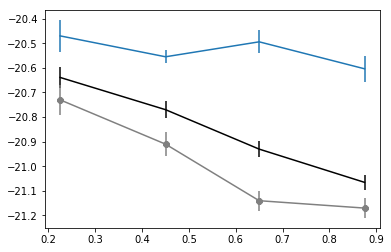

In [20]:
plt.errorbar(GAL_FIT_VALS.loc[GAL_FIT_VALS.index[0:4],'ave_z'],
             GAL_FIT_VALS.loc[GAL_FIT_VALS.index[0:4],'M'],
             yerr=GAL_FIT_VALS.loc[GAL_FIT_VALS.index[0:4],'M_unc'],
             color='black')
plt.errorbar(LCBG_FIT_VALS.loc[LCBG_FIT_VALS.index[0:4],'ave_z'],
             LCBG_FIT_VALS.loc[LCBG_FIT_VALS.index[0:4],'M'],
             yerr=LCBG_FIT_VALS.loc[LCBG_FIT_VALS.index[0:4],'M_unc'])
#plt.errorbar(WILLMER[:,0],
#             WILLMER[:,4],
#             yerr=WILLMER[:,5],
#             color='yellow',
#             fmt='->',
#             label='Willmer, 2006')
#plt.errorbar(FABER[:,0],
#             FABER[:,4],
#             yerr=FABER[:,5],
#             color='green',
#             fmt='-<',
#             label='Faber, 2007')
plt.errorbar(ZUCCAALPH[:,0],
             ZUCCAALPH[:,4],
             yerr=ZUCCAALPH[:,5],
             color='grey',
             fmt='-8',
             label='Zucca, 2009')
#plt.errorbar(COOL[:,0],
#             COOL[:,4],
#             yerr=COOL[:,5],
#             color='red',
#             fmt='-s',
#             label='Cool, 2012')
#plt.errorbar(FRITZ[:,0],
#             FRITZ[:,4],
#             yerr=FRITZ[:,5],
#             color='purple',
#             fmt='-*',
#             label='Fritz, 2014')
#plt.errorbar(BEAREALPH[:,0],
#             BEAREALPH[:,4],
#             yerr=BEAREALPH[:,5],
#             color='slateblue',
#             fmt='-d',
#             label='Beare, 2015')

Plotting phistar

<ErrorbarContainer object of 3 artists>

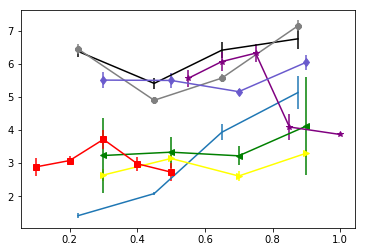

In [25]:
plt.errorbar(GAL_FIT_VALS.loc[GAL_FIT_VALS.index[0:4],'ave_z'],
             GAL_FIT_VALS.loc[GAL_FIT_VALS.index[0:4],'PHI']*1000,
             yerr=GAL_FIT_VALS.loc[GAL_FIT_VALS.index[0:4],'PHI_unc']*1000,
            color='black')
plt.errorbar(LCBG_FIT_VALS.loc[LCBG_FIT_VALS.index[0:4],'ave_z'],
             LCBG_FIT_VALS.loc[LCBG_FIT_VALS.index[0:4],'PHI']*1000,
             yerr=LCBG_FIT_VALS.loc[LCBG_FIT_VALS.index[0:4],'PHI_unc']*1000)
plt.errorbar(WILLMER[:,0],
             WILLMER[:,6],
             yerr=WILLMER[:,7],
             color='yellow',
             fmt='->',
             label='Willmer, 2006')
plt.errorbar(FABER[:,0],
             FABER[:,6],
             yerr=FABER[:,7],
             color='green',
             fmt='-<',
             label='Faber, 2007')
plt.errorbar(ZUCCAALPH[:,0],
             ZUCCAALPH[:,6],
             yerr=ZUCCAALPH[:,7],
             color='grey',
             fmt='-8',
             label='Zucca, 2009')
plt.errorbar(COOL[:,0],
             COOL[:,6],
             yerr=COOL[:,7],
             color='red',
             fmt='-s',
             label='Cool, 2012')
plt.errorbar(FRITZ[:,0],
             FRITZ[:,6],
             yerr=FRITZ[:,7],
             color='purple',
             fmt='-*',
             label='Fritz, 2014')
plt.errorbar(BEAREALPH[:,0],
             BEAREALPH[:,6],
             yerr=BEAREALPH[:,7],
             color='slateblue',
             fmt='-d',
             label='Beare, 2015')